In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP2 - 1er cuatri 2021
En esta carpeta de Jupyter vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Métodos
Los métodos evaluados en este notebook son los siguientes:

- **VMC** : vecino mas cercano
- **AGM** : arbol generador minimo
- **I** : incersion

# Experimentos
Leemos el dataframe con todos los resultados.

In [3]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados

,dataset,n,metodo,tiempo,costo
0,dataset_aleatorias,10,AGM,0.018330,1231
1,dataset_aleatorias,10,VMC,0.008803,874
2,dataset_aleatorias,15,AGM,0.023357,1396
3,dataset_aleatorias,15,VMC,0.012061,1235
4,dataset_aleatorias,20,AGM,0.033290,1129
...,...,...,...,...,...
261,dataset_aleatorias,175,I,1465.460000,9003
262,dataset_aleatorias,180,I,1611.590000,9952
263,dataset_aleatorias,185,I,1823.510000,6076
264,dataset_aleatorias,190,I,1904.760000,7891


In [4]:
df_resultados["metodo"] .unique()

array(['AGM', 'VMC', 'AGM-TS1', 'AGM-TS2', 'VMC-TS1', 'VMC-TS2', 'I'],
      dtype=object)

## Complejidad AGM

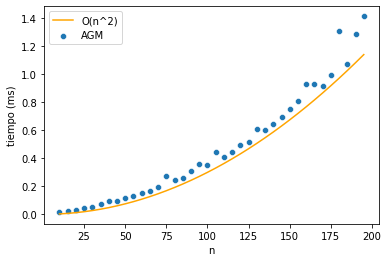

In [26]:
df_AGM = df_resultados[(df_resultados["metodo"]=="AGM") & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_AGM["tiempo_esperado"] = (df_AGM["n"]**2) * 0.00003; # exponencial

fig = sns.scatterplot(data=df_AGM, x='n', y='tiempo');
fig = sns.lineplot(data=df_AGM , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(n^2)','AGM']);
fig.set(xlabel='n', ylabel='tiempo (ms)');

Índice de correlación de Pearson: 0.9923997700942305


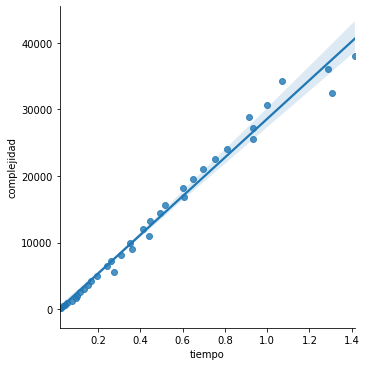

In [27]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_AGM = df_resultados[(df_resultados["metodo"]=="AGM") & (df_resultados["dataset"]=="dataset_aleatorias")].copy();
df_AGM["complejidad"] = df_AGM["n"] ** 2;
fig = sns.lmplot(data=df_AGM, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_AGM, "tiempo", "complejidad"));

## Complejidad VMC

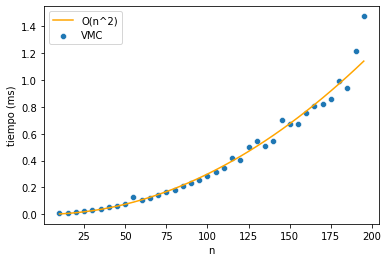

In [28]:
df_VMC = df_resultados[(df_resultados["metodo"]=="VMC") & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_VMC["tiempo_esperado"] = (df_VMC["n"]**2) * 0.00003; # exponencial

fig = sns.scatterplot(data=df_VMC, x='n', y='tiempo');
fig = sns.lineplot(data=df_VMC , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(n^2)','VMC']);
fig.set(xlabel='n', ylabel='tiempo (ms)');


Índice de correlación de Pearson: 0.9856000823504055


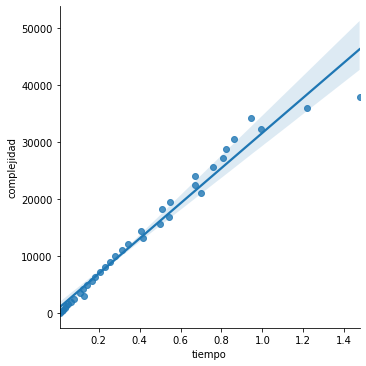

In [29]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_VMC = df_resultados[(df_resultados["metodo"]=="VMC") & (df_resultados["dataset"]=="dataset_aleatorias")].copy();
df_VMC["complejidad"] = df_VMC["n"] ** 2;
fig = sns.lmplot(data=df_VMC, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_VMC, "tiempo", "complejidad"));

## Complejidad Insercion

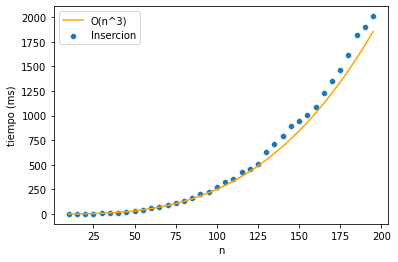

In [5]:
df_I = df_resultados[(df_resultados["metodo"]=="I") & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_I["tiempo_esperado"] = (df_I["n"]**3) * 0.00025; # exponencial

fig = sns.scatterplot(data=df_I, x='n', y='tiempo');
fig = sns.lineplot(data=df_I , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(n^3)','Insercion']);
fig.set(xlabel='n', ylabel='tiempo (ms)');

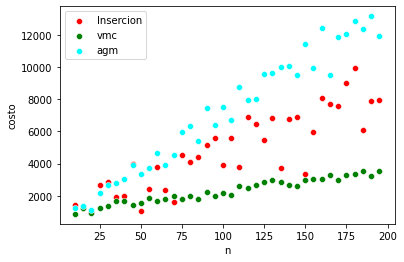

In [12]:
df_I = df_resultados[(df_resultados["metodo"]=="I") & (df_resultados["dataset"] == "dataset_aleatorias")].copy();
df_vmc = df_resultados[(df_resultados["metodo"]=="VMC") & (df_resultados["dataset"] == "dataset_aleatorias")].copy();
df_agm = df_resultados[(df_resultados["metodo"]=="AGM") & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

fig = sns.scatterplot(data=df_I, x='n', y='costo',color = "red");
fig = sns.scatterplot(data=df_vmc, x='n', y='costo',color = "green");
fig = sns.scatterplot(data=df_agm, x='n', y='costo',color = "cyan");

fig.legend(labels=['Insercion','vmc','agm']);


Índice de correlación de Pearson: 0.9993701838193951


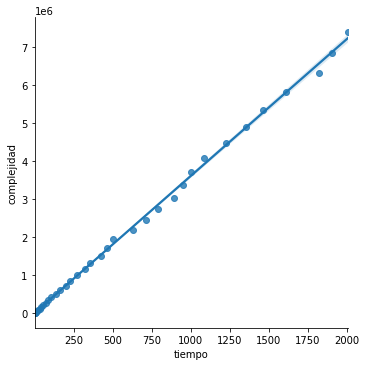

In [6]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_I = df_resultados[(df_resultados["metodo"]=="I") & (df_resultados["dataset"]=="dataset_aleatorias")].copy();
df_I["complejidad"] = df_I["n"] ** 3;
fig = sns.lmplot(data=df_I, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_I, "tiempo", "complejidad"));

## Tabu Search 1 - Con ciclos 

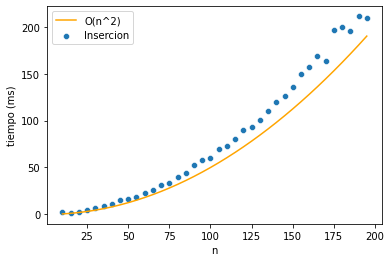

In [50]:
df_t = df_resultados[(df_resultados["metodo"]== "AGM-TS1" ) & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_t["tiempo_esperado"] = (df_t["n"]**2) * 0.005; # exponencial

fig = sns.scatterplot(data=df_t, x='n', y='tiempo');
fig = sns.lineplot(data=df_t , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(n^2)','Insercion']);
fig.set(xlabel='n', ylabel='tiempo (ms)');

Índice de correlación de Pearson: 0.9975884447553283


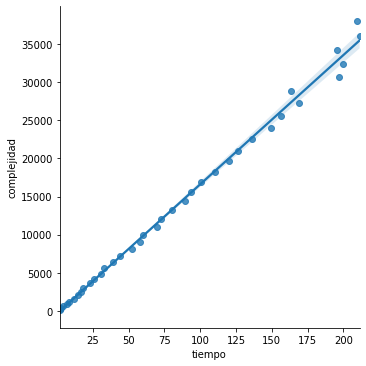

In [51]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_t = df_resultados[(df_resultados["metodo"]=="AGM-TS1") & (df_resultados["dataset"]=="dataset_aleatorias")].copy();
df_t["complejidad"] = df_t["n"] ** 2;
fig = sns.lmplot(data=df_t, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_t, "tiempo", "complejidad"));

## AGM-TS2

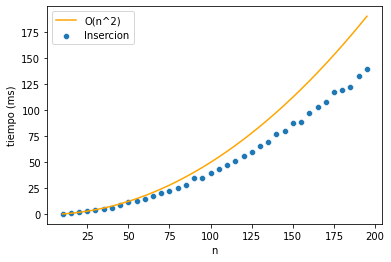

In [53]:
df_t = df_resultados[(df_resultados["metodo"]== "AGM-TS2" ) & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_t["tiempo_esperado"] = (df_t["n"]**2) * 0.005; # exponencial

fig = sns.scatterplot(data=df_t, x='n', y='tiempo');
fig = sns.lineplot(data=df_t , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(n^2)','Insercion']);
fig.set(xlabel='n', ylabel='tiempo (ms)');

Índice de correlación de Pearson: 0.9992866480283905


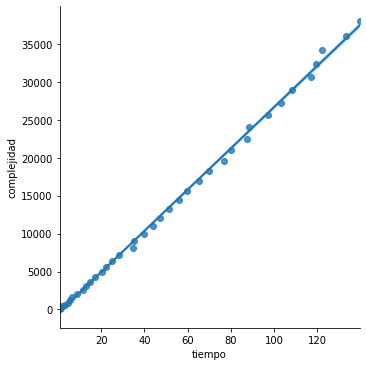

In [54]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_t = df_resultados[(df_resultados["metodo"]=="AGM-TS2") & (df_resultados["dataset"]=="dataset_aleatorias")].copy();
df_t["complejidad"] = df_t["n"] ** 2;
fig = sns.lmplot(data=df_t, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_t, "tiempo", "complejidad"));

## VMC-TS1

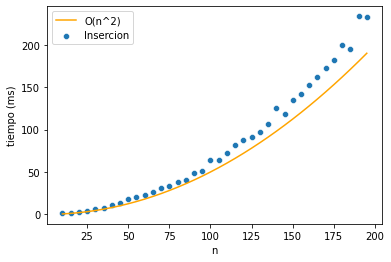

In [55]:
df_t = df_resultados[(df_resultados["metodo"]== "VMC-TS1" ) & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_t["tiempo_esperado"] = (df_t["n"]**2) * 0.005; # exponencial

fig = sns.scatterplot(data=df_t, x='n', y='tiempo');
fig = sns.lineplot(data=df_t , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(n^2)','Insercion']);
fig.set(xlabel='n', ylabel='tiempo (ms)');

Índice de correlación de Pearson: 0.998217673178808


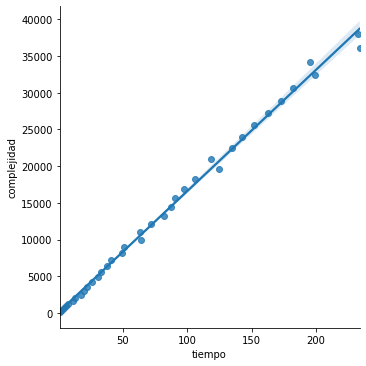

In [56]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_t = df_resultados[(df_resultados["metodo"]=="VMC-TS1") & (df_resultados["dataset"]=="dataset_aleatorias")].copy();
df_t["complejidad"] = df_t["n"] ** 2;
fig = sns.lmplot(data=df_t, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_t, "tiempo", "complejidad"));

## VMC-TS2

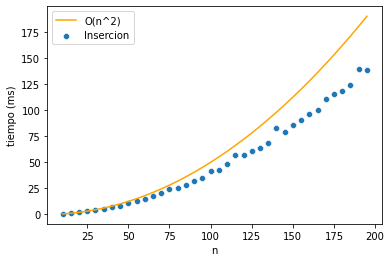

In [60]:
df_t = df_resultados[(df_resultados["metodo"]== "VMC-TS2" ) & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_t["tiempo_esperado"] = (df_t["n"]**2) * 0.005; # exponencial

fig = sns.scatterplot(data=df_t, x='n', y='tiempo');
fig = sns.lineplot(data=df_t , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(n^2)','Insercion']);
fig.set(xlabel='n', ylabel='tiempo (ms)');

Índice de correlación de Pearson: 0.9985038319452307


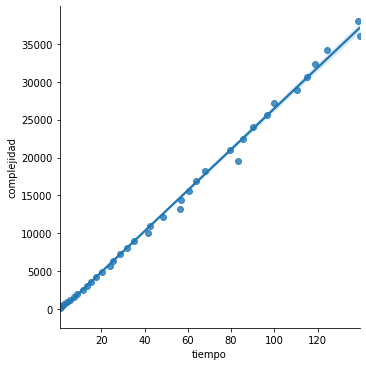

In [61]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_t = df_resultados[(df_resultados["metodo"]=="VMC-TS2") & (df_resultados["dataset"]=="dataset_aleatorias")].copy();
df_t["complejidad"] = df_t["n"] ** 2;
fig = sns.lmplot(data=df_t, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_t, "tiempo", "complejidad"));

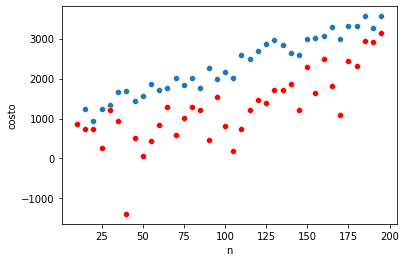

In [66]:

sns.scatterplot(data=df_VMC, x='n', y='costo');

sns.scatterplot(data=df_VMCt2, x='n', y='costo',color = "red");


In [64]:
df_VMCt2 = df_resultados[(df_resultados["metodo"]== "VMC-TS2" ) & (df_resultados["dataset"] == "dataset_aleatorias")].copy();

df_VMC = df_resultados[(df_resultados["metodo"]=="VMC") & (df_resultados["dataset"] == "dataset_aleatorias")].copy();


# Buscar rangos optimos TP

In [ ]:
# funcion de pandas

# GRAFICOS TP1

# Complejidad Fuerza Bruta

## Muchas soluciones vs Pocas Soluciones

In [16]:
df_FBMS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

df_FBMS["tiempo_esperado"] = 2.0**(df_FBMS["n"]) * 0.000005; # exponencial

fig = sns.scatterplot(data=df_FBMS, x='n', y='tiempo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

df_FBPS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();

df_FBPS["tiempo_esperado"] = 2.0**(df_FBPS["n"]) * 0.000005; # exponencial

fig = sns.scatterplot(data=df_FBPS, x='n', y='tiempo');

#fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');


# Muchas Soluciones

In [18]:
df_FBMS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

df_FBMS["tiempo_esperado"] = 2.0**(df_FBMS["n"]) * 0.000005; # exponencial

fig = sns.scatterplot(data=df_FBMS, x='n', y='tiempo');
fig = sns.lineplot(data=df_FBMS , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');

Índice de correlación de Pearson: 0.99990800463059


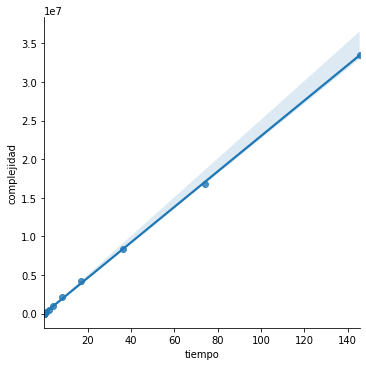

In [10]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_FBMS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="muchas-soluciones-validas")].copy();
df_FBMS["complejidad"] = 2.0 ** df_FBMS["n"];
fig = sns.lmplot(data=df_FBMS, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_FBMS, "tiempo", "complejidad"));

## Pocas soluciones

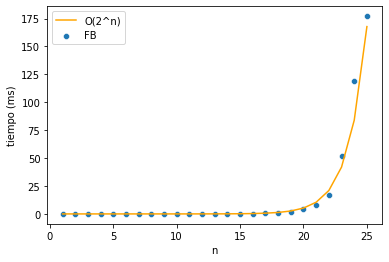

In [11]:
df_FBPS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();

df_FBPS["tiempo_esperado"] = 2.0**(df_FBPS["n"]) * 0.000005; # exponencial

fig = sns.scatterplot(data=df_FBPS, x='n', y='tiempo');
fig = sns.lineplot(data=df_FBPS , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9899959528554885


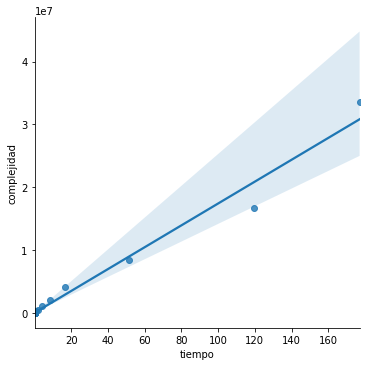

In [12]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_FBPS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="pocas-soluciones-validas")].copy();
df_FBPS["complejidad"] = 2.0 ** df_FBPS["n"];
fig = sns.lmplot(data=df_FBPS, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_FBPS, "tiempo", "complejidad"));

# Complejidad de Backtracking 

## Experimento: Mejor caso poda por factibilidad 
### Todos los productos rompen el tubo

### BT-F

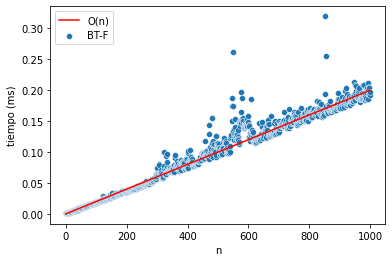

In [23]:
# todos romepen FACTIBILIDAD
#GUARDADO

df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "mejor-caso-bt-f")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["n"] * 0.0002; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='n', y='tiempo_esperado', color="red");
fig.legend(labels=['O(n)','BT-F']);
fig.set(xlabel='n', ylabel='tiempo (ms)');


Índice de correlación de Pearson: 0.977074806098859


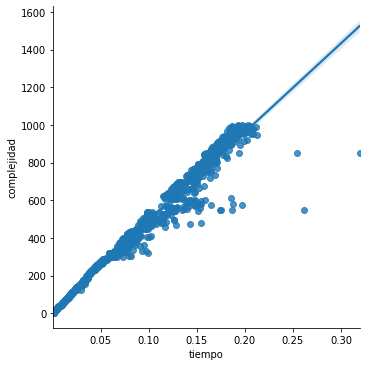

In [24]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
# GUARDADO

df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "mejor-caso-bt-f")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

### BT-O

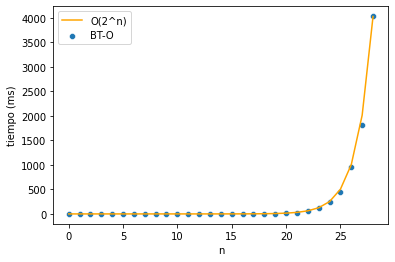

In [54]:
# todos rompen OPTIMALIDAD
# GUARDADO

df_BT_peor_caso_O = df_resultados[(df_resultados["metodo"]=="BT-O") & (df_resultados["dataset"] == "mejor-caso-bt-f")].copy();
df_BT_peor_caso_O["tiempo_esperado"] = 2 ** df_BT_peor_caso_O["n"] * 0.000015; # Lineal
fig = sns.scatterplot(data=df_BT_peor_caso_O, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso_O, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT-O']);
fig.set(xlabel='n', ylabel='tiempo (ms)');


Índice de correlación de Pearson: 0.9991682198837509


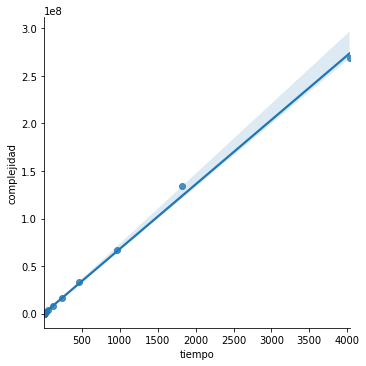

In [55]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
#GUARDADO

df_BT_peor_caso_O = df_resultados[(df_resultados["metodo"]=="BT-O") & (df_resultados["dataset"] == "mejor-caso-bt-f")].copy();
df_BT_peor_caso_O["complejidad"] = 2** df_BT_peor_caso_O["n"];
fig = sns.lmplot(data=df_BT_peor_caso_O, x="tiempo", y="complejidad");
plt.savefig("graficos/BT-O-PC-CORR.png");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso_O, "tiempo", "complejidad"));

# 0.9999985779011217

## PEOR CASO FACTIBILIDAD

BT-F

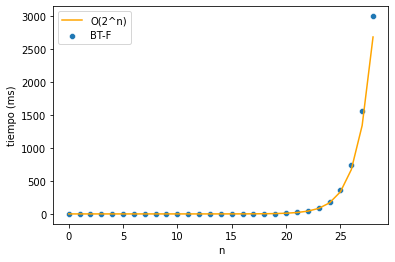

In [56]:
#GUARDADO

df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "peor-caso-bt-f")].copy();
df_BT_peor_caso["tiempo_esperado"] = 2 ** df_BT_peor_caso["n"] * 0.000010; # Lineal

fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(2^n)','BT-F']);
fig.set(xlabel='n', ylabel='tiempo (ms)');


Índice de correlación de Pearson: 0.9998371167278809


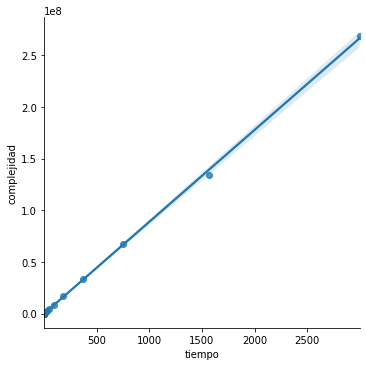

In [57]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
#GUARDADO

df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "peor-caso-bt-f")].copy();
df_BT_peor_caso["complejidad"] = 2 ** df_BT_peor_caso["n"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

# 0.9999989727641616

BT-O

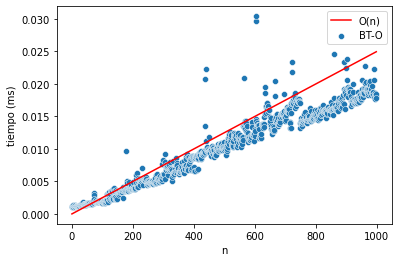

In [63]:
# todos rompen OPTIMALIDAD
#GUARDADO

df_BT_mejor_caso_O = df_resultados[(df_resultados["metodo"]=="BT-O") & (df_resultados["dataset"] == "peor-caso-bt-f")].copy();
df_BT_mejor_caso_O["tiempo_esperado"] = df_BT_mejor_caso_O["n"] * 0.000025; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso_O, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso_O, x='n', y='tiempo_esperado', color="red");
fig.legend(labels=['O(n)','BT-O']);
fig.set(xlabel='n', ylabel='tiempo (ms)');


Índice de correlación de Pearson: 0.9622833646146709


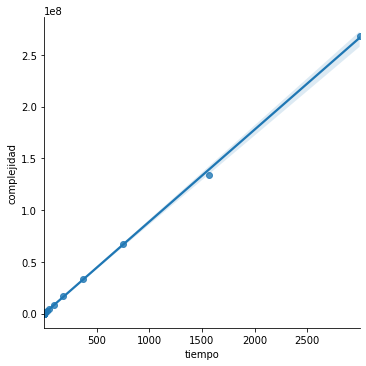

In [64]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.

#GUARDADO

df_BT_mejor_caso_O = df_resultados[(df_resultados["metodo"]=="BT-O") & (df_resultados["dataset"] == "peor-caso-bt-f")].copy();
df_BT_mejor_caso_O["complejidad"] = df_BT_mejor_caso_O["n"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso_O, "tiempo", "complejidad"));

#  0.9843029451631955

# Experimento: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

In [35]:
df_resultados["dataset"].unique()

array(['muchas-soluciones-validas', 'pocas-soluciones-validas',
       'mejor-caso-bt-f', 'peor-caso-bt-f', 'bt', 'dinamica'],
      dtype=object)

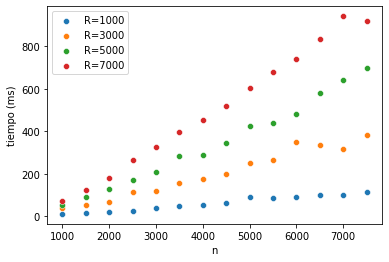

In [36]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==7000], x='n', y='tiempo');
fig.legend(labels=['R=1000','R=3000','R=5000','R=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

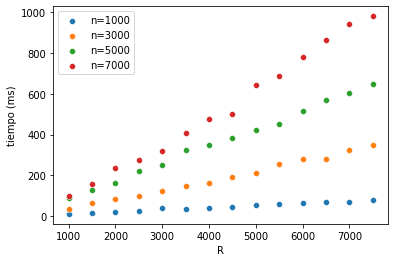

In [37]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='R', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='R', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-R.svg");

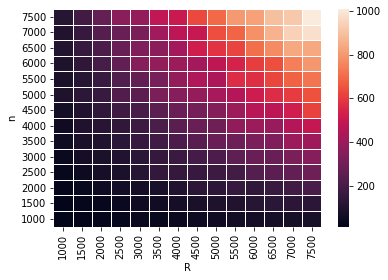

In [38]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='R', values='tiempo', aggfunc=np.mean);

#fig, ax = plt.subplots(figsize=(8,7)) 
fig = sns.heatmap(df_heatmap,linewidths=0.5);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.9951645527904385


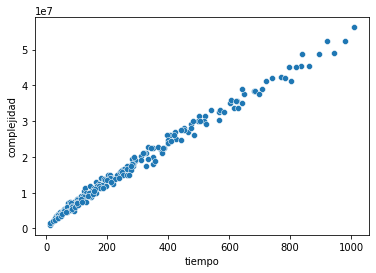

In [39]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["R"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

# Experimento Campana de Back-Tracking

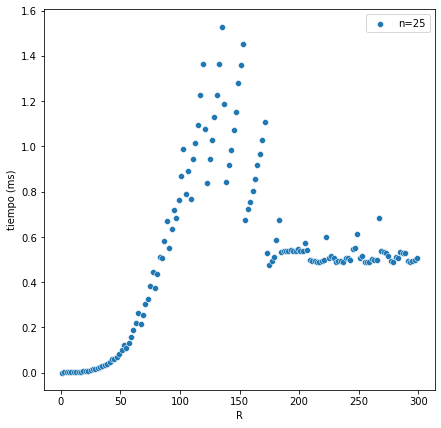

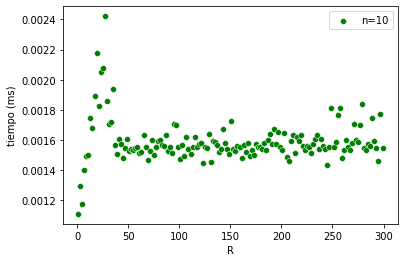

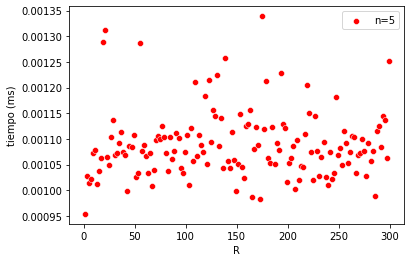

In [40]:
df_BT = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "bt")].copy();


fig, ax = plt.subplots(figsize=(7,7)) 
fig = sns.scatterplot(data=df_BT[df_BT["n"]==25], x='R', y='tiempo');
fig.set(xlabel='R', ylabel='tiempo (ms)');
fig.legend(labels=['n=25']);
plt.savefig("graficos/bt-campana-n25.svg");
plt.show()

fig = sns.scatterplot(data=df_BT[df_BT["n"]==10], x='R', y='tiempo',color = "green");
fig.set(xlabel='R', ylabel='tiempo (ms)');
fig.legend(labels=['n=10']);

plt.show()


fig = sns.scatterplot(data=df_BT[df_BT["n"]==5], x='R', y='tiempo',color = "red");
fig.set(xlabel='R', ylabel='tiempo (ms)');
fig.legend(labels=['n=5']);

plt.show()

In [41]:
#Tiempos de ejecucion ordenados de mayor a menor

df_BT.sort_values(by=['tiempo'],ascending = False )

,dataset,n,R,metodo,tiempo
6482,bt,30,167,BT,59.026500
6493,bt,30,189,BT,57.906400
6492,bt,30,187,BT,57.625700
6483,bt,30,169,BT,57.384700
6481,bt,30,165,BT,56.242700
...,...,...,...,...,...
2513,bt,4,29,BT,0.000922
2153,bt,1,209,BT,0.000914
2332,bt,2,267,BT,0.000901
2315,bt,2,233,BT,0.000899


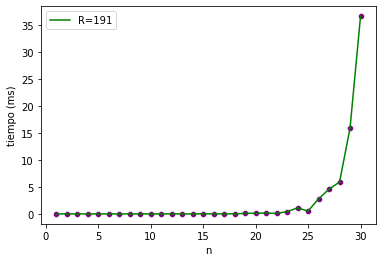

In [42]:
R = 191

df_BT = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "bt")].copy();

#df_BT["tiempo_esperado"] = ((df_BT["R"])**2) * 0.002; 

#fig = sns.lineplot(data=df_BT[df_BT["n"]==n][df_BT["R"]<180] , x='R', y='tiempo_esperado', color="orange");

fig = sns.scatterplot(data=df_BT[df_BT["R"] == R], x='n', y='tiempo',color = "purple");
fig = sns.lineplot(data=df_BT[df_BT["R"] == R], x='n', y='tiempo',color = "green");

fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.legend(labels=[f'R={R}']);
plt.show()

In [43]:
tiemposmax = []
Rs_max = []

for n in df_BT["n"].unique().tolist():
    column = df_BT[df_BT["n"]==n]["tiempo"]

    max_value = column.max()
    tiemposmax.append(max_value)
    max_index = column.idxmax()
    max_r = df_BT["R"][max_index]
    Rs_max.append(max_r)
    

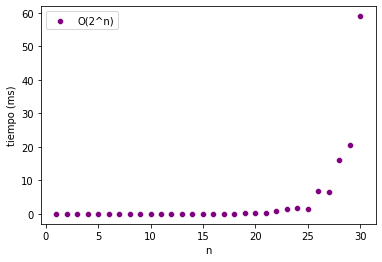

In [44]:
ejex = df_BT["n"].unique().tolist()


fig = sns.scatterplot(x= ejex, y=tiemposmax,color = "purple");

fig.legend(labels=['O(2^n)','BT peor caso']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

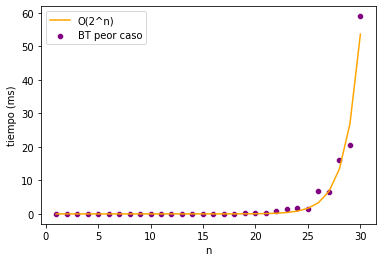

In [45]:
ejex = df_BT["n"].unique().tolist()

tiempo_esperado = [2.0**(i)* 0.00000005  for i in ejex]; # exponencial

fig = sns.scatterplot(x= ejex, y=tiemposmax,color = "purple");
fig = sns.lineplot( x=ejex, y=tiempo_esperado, color="orange");

fig.legend(labels=['O(2^n)','BT peor caso']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-peor-caso.svg");

In [46]:
complejidad = [2.0**(i)  for i in ejex]; 

np.corrcoef(tiemposmax, complejidad)[0,1]

0.988979234956919

# BackTrackin vs Programacion Dinamica

## Experimento 2 :

## Pocas soluciones : bt vs pd

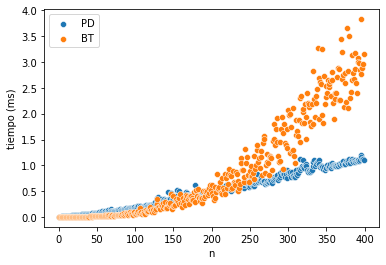

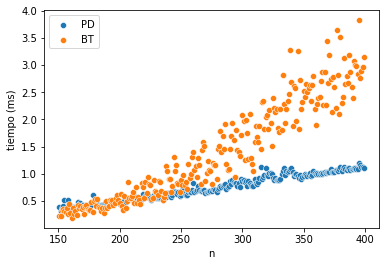

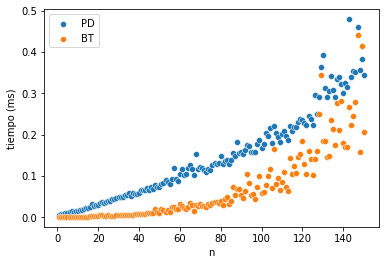

In [47]:
df_pd = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();

fig = sns.scatterplot(data=df_pd, x='n', y='tiempo');
fig = sns.scatterplot(data=df_bt, x='n', y='tiempo');

fig.legend(labels=['PD','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.show()
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");
desde = 150
fig = sns.scatterplot(data=df_pd[desde < df_pd["n"]], x='n', y='tiempo');
fig = sns.scatterplot(data=df_bt[desde<df_bt["n"] ], x='n', y='tiempo');

fig.legend(labels=['PD','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.show()
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

hasta = 150
fig = sns.scatterplot(data=df_pd[df_pd["n"] <= hasta], x='n', y='tiempo');
fig = sns.scatterplot(data=df_bt[df_bt["n"] <= hasta], x='n', y='tiempo');

fig.legend(labels=['PD','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");
